In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

<ipython-input-2-4290896f13fa>:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


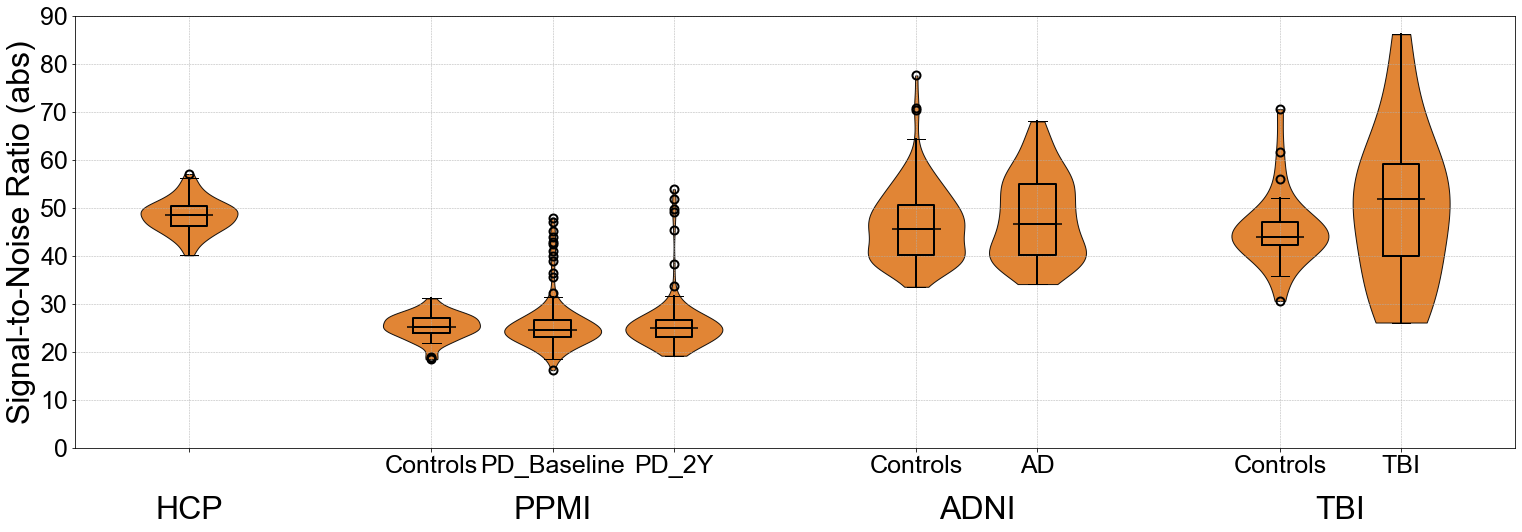

In [2]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.default'] = 'regular'

fig = plt.figure(figsize=(25, 10))

plot_area = [0.1, 0.2, 0.8, 0.6] 
ax = fig.add_axes(plot_area)


base_path = "/Users/markolchanyi/Desktop/BSB_validation/"
files = {
    "HCP": base_path + "HCP100_noise.txt",
    "PPMI_Controls": base_path + "PPMI_controls_noise.txt",
    "PPMI_PD_Baseline": base_path + "PPMI_PD_noise.txt",
    "PPMI_PD_24mo": base_path + "PPMI_PD_24mo_noise.txt",
    "ADNI_Controls": base_path + "ADNI_controls_noise.txt",
    "ADNI_AD": base_path + "ADNI_patients_noise.txt",
    "TBI_Controls": base_path + "RESPONSE_controls_noise.txt",
    "TBI_TBI": base_path + "RESPONSE_tbi_noise.txt"
}

def load_data(file_path):
    with open(file_path, 'r') as file:
        data = file.read().splitlines()
    return [float(value) for value in data]

# Load PPMI data
ppmi_controls = load_data(files["PPMI_Controls"])
ppmi_pd_baseline = load_data(files["PPMI_PD_Baseline"])
ppmi_pd_24mo = load_data(files["PPMI_PD_24mo"])

# Load ADNI data
adni_controls = load_data(files["ADNI_Controls"])
adni_ad = load_data(files["ADNI_AD"])

# Load TBI data
tbi_controls = load_data(files["TBI_Controls"])
tbi_tbi = load_data(files["TBI_TBI"])

# Load HCP data
hcp = load_data(files["HCP"])


data = [hcp, ppmi_controls, ppmi_pd_baseline, ppmi_pd_24mo, adni_controls, adni_ad, tbi_controls, tbi_tbi]
positions = [10, 30, 40, 50, 70, 80, 100, 110]

vp = plt.violinplot(data, positions=positions, widths=8, showextrema=False, showmedians=True)

for i in range(0, len(positions)):
    vp['bodies'][i].set_facecolor("#DE781F")
    vp['bodies'][i].set_edgecolor('black')
    vp['bodies'][i].set_alpha(0.9)

medianprops = dict(linestyle='-', linewidth=2, color='black')
boxprops = dict(linestyle='-', linewidth=2, color='black')
flierprops = dict(marker='o', markerfacecolor='none', markersize=8, linestyle='none', markeredgecolor='black', markeredgewidth=2)
whiskerprops = dict(linewidth=2)
plt.boxplot(data, positions=positions, widths=3, flierprops=flierprops, whiskerprops=whiskerprops, medianprops=medianprops, boxprops=boxprops)

for line in vp['cmedians'].get_segments():
    vp['cmedians'].set_edgecolor('black')

# Aesthetics
subgroup_names = [" ", "Controls", "PD_Baseline", "PD_2Y", "Controls", "AD", "Controls", "TBI"]
dataset_names = ["HCP", "PPMI", "PPMI", "PPMI", "ADNI", "ADNI", "TBI", "TBI"]


ax.set_xticks(positions)
ax.set_xticklabels(subgroup_names, fontsize=25, fontweight='regular')


dataset_positions = {
    "HCP": (positions[0]),
    "PPMI": (positions[1] + positions[3]) / 2,
    "ADNI": (positions[4] + positions[5]) / 2,
    "TBI": (positions[6] + positions[7]) / 2
}

for ds_name, pos in dataset_positions.items():
    ax.text(pos, -10, ds_name, ha='center', va='top', fontsize=32, fontweight='regular')

plt.yticks(fontsize=25, fontweight='regular')
plt.ylim([0, 90])
plt.ylabel('Signal-to-Noise Ratio (abs)', fontsize=32)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig('/Users/markolchanyi/Desktop/BSB_Figs/datasets_SNR.png', dpi=300)
plt.show()
